# Import Libraries

In [386]:
# libraries that deal with grabbing from the .env file
from dotenv import load_dotenv
import os

# make url requests
import requests

# make DFs
import pandas as pd

# show images in notebook
from IPython.display import display, Image

import ast  # for safely parsing JSON strings in Python

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import time
import requests

from ratelimit import limits, sleep_and_retry
import requests



# Setup stuff

In [387]:
# Remove the cached environment variable (if any)
os.environ.pop('riot_api_key', None)

# Reload the .env file
load_dotenv()

# Fetch the API key
api_key = os.environ.get('riot_api_key')

# Defining Functions

## Get Puuid

In [388]:
def get_puuid(summonerId=None, gameName=None, tagLine=None, region='americas'):
    """Gets the puuid from a summonerId or Riot_id and riot_tag
    
    Args:
        summonerId (str, optional): Summoner ID. Defaults to None.
        gameName (str, optional): Riot ID. Defaults to None.
        tagLine (str, optional): Riot Tag. Defaults to None.
        region (str, optional): Region. Defaults to 'americas'.
        
    Returns:
        str: puuid
    """
# using summonerID 
    if summonerId is not None:
        root_url = f'https://{region}.api.riotgames.com/'
        endpoint = 'lol/summoner/v4/summoners/'
        print(root_url+endpoint+summonerId+'?api_key='+api_key)
        response = requests.get(root_url+endpoint+summonerId+'?api_key='+api_key)

        return response.json()['puuid']
    else:
        #using gamename + tagline for example HGILLIS + NA1
        root_url = f'https://{region}.api.riotgames.com/'
        endpoint = f'riot/account/v1/accounts/by-riot-id/{gameName}/{tagLine}'

        response = requests.get(root_url+endpoint+'?api_key='+api_key)

        return response.json()['puuid']
    


## Get match history (list of game ids)

In [389]:
def get_match_history(region=None, puuid=None, start=0, count=48):
    root_url = f'https://{region}.api.riotgames.com/'
    endpoint = f'lol/match/v5/matches/by-puuid/{puuid}/ids'
    query_params = f'?start={start}&count={count}' #changing starting index (start) and number of matches retrieved (count)

    response = requests.get(root_url + endpoint + query_params + '&api_key=' + api_key)
    
    return response.json()


## get info for single game

In [390]:
def get_match_data_from_id(region = None, matchId = None):

    root_url = f'https://{region}.api.riotgames.com/'
    endpoint = f'lol/match/v5/matches/{matchId}'


    response = requests.get(root_url + endpoint + '?api_key=' + api_key)

    return response.json()

## Process match history

In [391]:


def process_match_json(match_json, puuid):
    ## Architecture
    # left side is my name, right side is riots name
    metadata = match_json['metadata']
    info = match_json['info']
    game_mode = info['gameMode']
    players = info['participants']
    participants = metadata['participants']
    teams = info['teams']
    player = players[participants.index(puuid)]
    perks = player['perks']
    stats = perks ['statPerks']
    styles = perks['styles']

    primary = styles[0]
    secondary = styles[1]

    match_id = metadata['matchId']


    game_creation = info['gameCreation']
    game_duration = info['gameDuration']
    game_start_timestamp = info['gameStartTimestamp']
    game_end_timestamp = info['gameEndTimestamp']
    patch = info['gameVersion']

    riot_id = player['riotIdGameName']
    riot_tag = player['riotIdTagline']
    summoner_id = player['summonerId']
    summoner_name = player['summonerName']

    win = player['win']

    champ_id = player['championId']
    champ_transform = player['championTransform']
    champ_level = player['champLevel']

    gold_earned = player['goldEarned']
    neutral_minions_killed = player['neutralMinionsKilled']
    total_minions_killed = player['totalMinionsKilled']

    kills = player['kills']
    deaths = player['deaths']
    assists = player['assists']
    first_blood = player['firstBloodKill']

    total_damage_dealt= player['totalDamageDealtToChampions']
    total_damage_shielded = player['totalDamageShieldedOnTeammates']
    total_damage_taken = player['totalDamageTaken']
    total_damage_healed = player['totalHealsOnTeammates']
    total_minions_killed = player['totalMinionsKilled']
    total_time_cc_dealt = player['totalTimeCCDealt']

    early_surrender = player['gameEndedInEarlySurrender']
    surrender = player['gameEndedInSurrender']

    item0 = player['item0']
    item1 = player['item1']
    item2 = player['item2']
    item3 = player['item3']
    item4 = player['item4']
    item5 = player['item5']
    item6 = player['item6']

    summoner_1_id = player['summoner1Id']
    summoner_2_id = player['summoner2Id']


    wards_placed = player['wardsPlaced']
    vision_score = player['visionScore']







    defense = stats['defense']
    flex = stats['flex']
    offense = stats['offense']


    primary_style = primary['style']
    secondary_style = primary['style']

    primary_keystone = primary['selections'][0]['perk']
    primary_perk_1 = primary['selections'][1]['perk']
    primary_perk_2 = primary['selections'][2]['perk']
    primary_perk_3 = primary['selections'][3]['perk']

    secondary_perk_1 = secondary['selections'][0]['perk']
    secondary_perk_2 = secondary['selections'][1]['perk']


    objectives_stolen = player['objectivesStolen']
    objectives_stolen_assists = player['objectivesStolenAssists']

    ##what is this?
    detector_wars_placed = player['detectorWardsPlaced']
    vision_wards_bought = player['visionWardsBoughtInGame']
    role = player['role']

    damage_dealt_to_buildings = player['damageDealtToBuildings']
    damage_dealt_to_objectives = player['damageDealtToObjectives']
    damage_dealt_to_turrets = player['damageDealtToTurrets']
    game_ended_in_surrender = player['gameEndedInSurrender']
    gold_earned = player['goldEarned']
    individual_position = player['individualPosition']
    inhibitor_takedowns = player['inhibitorTakedowns']
    largest_killing_spree = player['largestKillingSpree']
    largest_multi_kill = player['largestMultiKill']
    total_damage_shielded_on_teammates = player['totalDamageShieldedOnTeammates']
    total_heals_on_teammates = player['totalHealsOnTeammates']
    total_minions_killed = player['totalMinionsKilled']
    vision_score = player['visionScore']

    matchDF = pd.DataFrame({
        'match_id': [match_id],
        'game_mode': [game_mode],
        'participants': [participants],
        'game_creation': [game_creation],
        'game_duration': [game_duration],
        'game_start_timestamp': [game_start_timestamp],
        'game_end_timestamp': [game_end_timestamp],
        'patch': [patch],
        'puuid': [puuid],
        'riot_id': [riot_id],
        'riot_tag': [riot_tag],
        'summoner_id': [summoner_id],
        'summoner_name': [summoner_name],
        'win': [win],
        'champion': [champ_id],
        'champion_transform': [champ_transform],
        'champion_level': [champ_level],
        'kills': [kills],
        'deaths': [deaths],
        'assists': [assists],
        'summoner1_id': [summoner_1_id],
        'summoner2_id': [summoner_2_id],
        'gold_earned': [gold_earned],
        'total_minions_killed': [total_minions_killed],
        'total_neutral_minions_killed': [neutral_minions_killed],
        'early_surrender': [early_surrender],
        'surrender': [surrender],
        'first_blood': [first_blood],
        'objectives_stolen': [objectives_stolen],
        'objectives_stolen_assists': [objectives_stolen_assists],
        'total_damage_dealt_champions': [total_damage_dealt],
        'total_damage_taken': [total_damage_taken],
        'total_damage_shielded_teammates': [total_damage_shielded],
        'total_time_crowd_controlled': [total_time_cc_dealt],
        'vision_score': [vision_score],
        'wards_placed': [wards_placed],
        'item0': [item0],
        'item1': [item1],
        'item2': [item2],
        'item3': [item3],
        'item4': [item4],
        'item5': [item5],
        'item6': [item6],
        'perk_keystone': [primary_keystone],
        'perk_primary_row_1': [primary_perk_1],
        'perk_primary_row_2': [primary_perk_2],
        'perk_primary_row_3': [primary_perk_3],
        'perk_secondary_row_1': [secondary_perk_1],
        'perk_secondary_row_2': [secondary_perk_2],
        'perk_primary_style': [primary_style],
        'perk_secondary_style': [secondary_style],
        'perk_shard_defense': [defense],
        'perk_shard_flex': [flex],
        'perk_shard_offense': [offense],
        'damage_dealt_to_buildings': [damage_dealt_to_buildings],
        'damage_dealt_to_objectives': [damage_dealt_to_objectives],
        'damage_dealt_to_turrets': [damage_dealt_to_turrets],
        'game_ended_in_surrender': [game_ended_in_surrender],
        'individual_position': [individual_position],
        'inhibitor_takedowns': [inhibitor_takedowns],
        'largest_killing_spree': [largest_killing_spree],
        'largest_multi_kill': [largest_multi_kill],
        'total_damage_shielded_on_teammates': [total_damage_shielded_on_teammates],
        'total_heals_on_teammates': [total_heals_on_teammates],
        'total_minions_killed': [total_minions_killed],
        'vision_score': [vision_score],
    })


    return matchDF


## go from json to english

In [392]:

def json_extract(obj, key):
    arr = []
    
    def extract(obj, arr, key):
        if isinstance(obj, dict):
            for k, v in obj.items():
                if k == key:
                    arr.append(v)
                elif isinstance(v, (dict, list)):
                    extract(v, arr, key)
        elif isinstance(obj, list):
            for item in obj:
                extract(item, arr, key)
        return arr

    values = extract(obj, arr, key)
    return values


# Community Dragon

In [393]:
# keys to go from numbers to actual names

perk = 'https://raw.communitydragon.org/latest/plugins/rcp-be-lol-game-data/global/default/v1/perks.json'
perk_styles = 'https://raw.communitydragon.org/latest/plugins/rcp-be-lol-game-data/global/default/v1/perkstyles.json'
champ = 'https://raw.communitydragon.org/latest/plugins/rcp-be-lol-game-data/global/default/v1/champion-summary.json'
item = 'https://raw.communitydragon.org/latest/plugins/rcp-be-lol-game-data/global/default/v1/items.json'

perk_json = requests.get(perk).json()
perk_styles_json = requests.get(perk_styles).json()
champ_json = requests.get(champ).json()
item_json = requests.get(item).json()

In [394]:
# code to replace all of the perk numbers with the actual perks

perk_ids = json_extract(perk_json, 'id')
perk_names = json_extract(perk_json, 'name')

perk_dict = dict(map(lambda i, j : (int(i),j), perk_ids, perk_names))

perk_styles_ids = json_extract(perk_styles_json, 'id')
perk_styles_names = json_extract(perk_styles_json, 'name')

perk_styles_dict = dict(map(lambda i, j : (int(i),j), perk_styles_ids, perk_styles_names))

In [395]:
# code to replace all of the champion numbers with the actual champions
champ_ids = json_extract(champ_json, 'id')
champ_names = json_extract(champ_json, 'name')

# Assuming champ_json is a list of dictionaries with each dictionary containing 'id' and 'name'
champ_dict = {int(champ['id']): champ['name'] for champ in champ_json}



In [396]:
# code to replace all of the item numbers with the actual items
item_ids = json_extract(item_json, 'id')
item_names = json_extract(item_json, 'name')

# Assuming champ_json is a list of dictionaries with each dictionary containing 'id' and 'name'
item_dict = {int(item['id']): item['name'] for item in item_json}


# Get player names

In [397]:
# input username, region code here, asking for user input

# Prompt user for input
gameNameOne = input("Enter your summoner: ")


# Prompt user for input with a default value
tagLineOne = input("Enter tagline (default: NA1): ")

# Use default value if input is empty
tagLineOne = tagLineOne if tagLineOne.strip() else "NA1"

print(gameNameOne, tagLineOne)






# input username, region code here, asking for user input

# Prompt user for input of second player
gameNameTwo = input("Enter your friends summoner: ")


# Prompt user for input with a default value
tagLineTwo = input("Enter tagline (default: NA1): ")

# Use default value if input is empty
tagLineTwo = tagLineTwo if tagLineTwo.strip() else "NA1"

print(gameNameTwo, tagLineTwo)



MitchTheGreatest NA1
SirNutBust 2583


# Get both players PUUIDs

In [398]:
# get player 1 puuid
puuidOne = get_puuid(gameName=gameNameOne, tagLine=tagLineOne)

# get player 2 puuid
puuidTwo = get_puuid(gameName=gameNameTwo, tagLine=tagLineTwo)

print(puuidOne)
print(puuidTwo)

v9cKAiyHdtPQ4HXfm7RKoUiH4Qme9tpon2h-j6977gySZVShcbpHA_rqcGRtvR_jdIltku3KSZRBYw
7eu0uVJ6yplCCchce_vB8YyOtD_huOXHc0yfQE1PlANk5ctQZPlYx_6wBU3zKblMOHj-PZujn8w3gA


# Get both players match histories

In [399]:
# Get match IDs for the first game
match_idsOne = get_match_history(region='americas', puuid=puuidOne)

# Initialize an empty DataFrame for the first game
matchHistoryDfOne = pd.DataFrame()

# Populate the DataFrame with match data for the first game
for match_id in match_idsOne:
    gameone = get_match_data_from_id(region='americas', matchId=match_id)
    matchDFOne = process_match_json(gameone, puuid=puuidOne)
    matchHistoryDfOne = pd.concat([matchHistoryDfOne, matchDFOne])

# Get match IDs for the second game
match_idsTwo = get_match_history(region='americas', puuid=puuidTwo)

# Initialize an empty DataFrame for the second game
matchHistoryDfTwo = pd.DataFrame()

# Populate the DataFrame with match data for the second game
for match_id in match_idsTwo:
    gametwo = get_match_data_from_id(region='americas', matchId=match_id)
    matchDFTwo = process_match_json(gametwo, puuid=puuidTwo)
    matchHistoryDfTwo = pd.concat([matchHistoryDfTwo, matchDFTwo])

# Now, `matchHistoryDfOne` and `matchHistoryDfTwo` are isolated and contain data for different game names


In [400]:
matchHistoryDfOne


,match_id,game_mode,participants,game_creation,game_duration,game_start_timestamp,game_end_timestamp,patch,puuid,riot_id,riot_tag,summoner_id,summoner_name,win,champion,champion_transform,champion_level,kills,deaths,assists,summoner1_id,summoner2_id,gold_earned,total_minions_killed,total_neutral_minions_killed,early_surrender,surrender,first_blood,objectives_stolen,objectives_stolen_assists,total_damage_dealt_champions,total_damage_taken,total_damage_shielded_teammates,total_time_crowd_controlled,vision_score,wards_placed,item0,item1,item2,item3,item4,item5,item6,perk_keystone,perk_primary_row_1,perk_primary_row_2,perk_primary_row_3,perk_secondary_row_1,perk_secondary_row_2,perk_primary_style,perk_secondary_style,perk_shard_defense,perk_shard_flex,perk_shard_offense,damage_dealt_to_buildings,damage_dealt_to_objectives,damage_dealt_to_turrets,game_ended_in_surrender,individual_position,inhibitor_takedowns,largest_killing_spree,largest_multi_kill,total_damage_shielded_on_teammates,total_heals_on_teammates
0,NA1_5185026871,CLASSIC,[d66zRs2wr3In3cbz_fPo1cbUt99SyQNUr78FGsGcm_Bma...,1734499754015,1972,1734499781499,1734501753808,14.24.644.2327,v9cKAiyHdtPQ4HXfm7RKoUiH4Qme9tpon2h-j6977gySZV...,Mitchthegreatest,NA1,AqKiWRt3MKVJba4H7U7arZ6T_awbdSbg6V663ypAO3d7afc,Mitchthegreatest,True,18,0,17,12,5,12,21,4,18434,229,4,False,False,True,0,0,33370,27331,0,113,20,12,3072,3031,3006,3032,6675,3033,3340,8008,9111,9104,8014,8139,8135,8000,8000,5001,5008,5005,15763,30109,15763,False,BOTTOM,2,4,2,0,0
0,NA1_5184982618,CLASSIC,[d66zRs2wr3In3cbz_fPo1cbUt99SyQNUr78FGsGcm_Bma...,1734497182447,2309,1734497210384,1734499519782,14.24.644.2327,v9cKAiyHdtPQ4HXfm7RKoUiH4Qme9tpon2h-j6977gySZV...,Mitchthegreatest,NA1,AqKiWRt3MKVJba4H7U7arZ6T_awbdSbg6V663ypAO3d7afc,Mitchthegreatest,False,111,0,16,1,7,25,14,4,10476,33,0,False,False,False,0,0,13955,30509,2368,544,75,35,1031,3190,3869,2504,3111,3076,3364,8351,8306,8345,8347,8473,8242,8300,8300,5001,5001,5005,958,2053,958,False,UTILITY,0,0,1,2368,0
0,NA1_5184961755,CLASSIC,[d66zRs2wr3In3cbz_fPo1cbUt99SyQNUr78FGsGcm_Bma...,1734495791967,913,1734495874215,1734496787601,14.24.644.2327,v9cKAiyHdtPQ4HXfm7RKoUiH4Qme9tpon2h-j6977gySZV...,Mitchthegreatest,NA1,AqKiWRt3MKVJba4H7U7arZ6T_awbdSbg6V663ypAO3d7afc,Mitchthegreatest,True,222,0,9,7,3,8,21,4,7825,107,0,False,True,True,0,0,13420,6361,0,40,12,5,1083,3087,3006,1043,1042,0,3340,8008,8009,9103,8014,8233,8236,8000,8000,5001,5008,5005,2466,3979,2466,True,BOTTOM,0,6,1,0,0
0,NA1_5184839751,CLASSIC,[c6XUe8VJ1RpWSOO7lnMCqutHRNBCKqulc56qkwPkHM3L5...,1734488828340,2166,1734488880877,1734491046936,14.24.644.2327,v9cKAiyHdtPQ4HXfm7RKoUiH4Qme9tpon2h-j6977gySZV...,Mitchthegreatest,NA1,AqKiWRt3MKVJba4H7U7arZ6T_awbdSbg6V663ypAO3d7afc,Mitchthegreatest,False,6,0,17,9,9,7,11,4,14166,49,148,False,True,False,0,0,26488,45313,0,559,22,13,6694,3009,6631,6696,3814,0,3340,8230,8275,8234,8236,8429,8451,8200,8200,5001,5008,5008,78,13818,78,True,JUNGLE,0,4,2,0,0
0,NA1_5184808493,CLASSIC,[23S2AmE8wtSZuRvYgSCBruFSBHn4bMRPXbOWmGN8csVrQ...,1734487042483,1453,1734487070854,1734488523990,14.24.644.2327,v9cKAiyHdtPQ4HXfm7RKoUiH4Qme9tpon2h-j6977gySZV...,Mitchthegreatest,NA1,AqKiWRt3MKVJba4H7U7arZ6T_awbdSbg6V663ypAO3d7afc,Mitchthegreatest,False,16,0,10,0,5,2,7,4,5569,23,0,False,True,False,0,0,5908,14090,524,189,42,18,6617,3013,3870,3066,3801,0,3364,8214,8226,8234,8232,8473,8453,8200,8200,5001,5010,5007,777,1140,777,True,UTILITY,0,0,0,524,8434
0,NA1_5184801910,CLASSIC,[AUH1Q82OXhZdBwv27hvW2GN-9B49hv_nxl9e14lAn70Ri...,1734486430890,124,1734486675564,1734486799879,14.24.644.2327,v9cKAiyHdtPQ4HXfm7RKoUiH4Qme9tpon2h-j6977gySZV...,Mitchthegreatest,NA1,AqKiWRt3MKVJba4H7U7arZ6T_awbdSbg6V663ypAO3d7afc,Mitchthegreatest,False,22,0,1,0,0,2,7,4,725,2,0,True,False,False,0,0,943,406,0,29,0,1,3865,2003,2010,0,0,0,3340,8008,8009,9104,8017,8410,8345,8000,8000,5011,5008,5005,0,0,0,False,UTILITY,0,0,0,0,80
0,NA1_5183846177,CLASSIC,[lu86xc2iwzHsKC3vgIqPJmxrDzIU0zaqVMGaxykpo7Fts...,1734392259230,1596,1734392335168,1734393931440,

In [401]:
matchHistoryDfTwo

,match_id,game_mode,participants,game_creation,game_duration,game_start_timestamp,game_end_timestamp,patch,puuid,riot_id,riot_tag,summoner_id,summoner_name,win,champion,champion_transform,champion_level,kills,deaths,assists,summoner1_id,summoner2_id,gold_earned,total_minions_killed,total_neutral_minions_killed,early_surrender,surrender,first_blood,objectives_stolen,objectives_stolen_assists,total_damage_dealt_champions,total_damage_taken,total_damage_shielded_teammates,total_time_crowd_controlled,vision_score,wards_placed,item0,item1,item2,item3,item4,item5,item6,perk_keystone,perk_primary_row_1,perk_primary_row_2,perk_primary_row_3,perk_secondary_row_1,perk_secondary_row_2,perk_primary_style,perk_secondary_style,perk_shard_defense,perk_shard_flex,perk_shard_offense,damage_dealt_to_buildings,damage_dealt_to_objectives,damage_dealt_to_turrets,game_ended_in_surrender,individual_position,inhibitor_takedowns,largest_killing_spree,largest_multi_kill,total_damage_shielded_on_teammates,total_heals_on_teammates
0,NA1_5183844980,CLASSIC,[iBgT9CSm3VvVqFdPylPcFfANc4bfvcXDFtymA2nMPS-zL...,1734392075231,1603,1734392248561,1734393851706,14.24.644.2327,7eu0uVJ6yplCCchce_vB8YyOtD_huOXHc0yfQE1PlANk5c...,SirNutBust,2583,_zSUPdXwDoVYPTzXjue6gnjqBXjkekFKmDkpMUCDlNeDob0,NutBustSir,False,103,0,12,3,8,6,4,14,7555,112,0,False,False,False,0,0,17397,18307,0,50,14,8,2421,1056,3118,3020,1058,0,3340,8112,8139,8138,8106,8226,8210,8100,8100,5001,5008,5005,0,250,0,False,MIDDLE,0,2,1,0,0
0,NA1_5183209013,ARAM,[7CKBN69b23h8oNhnZ_Q81daYeS0nPYj5aNo8lekjqnJ9W...,1734319005353,1567,1734319040164,1734320607783,14.24.643.5128,7eu0uVJ6yplCCchce_vB8YyOtD_huOXHc0yfQE1PlANk5c...,SirNutBust,2583,_zSUPdXwDoVYPTzXjue6gnjqBXjkekFKmDkpMUCDlNeDob0,NutBustSir,True,876,0,18,4,18,22,4,32,14864,58,0,False,False,False,0,0,40837,52463,0,311,0,0,4629,2503,3020,6653,3116,0,2052,8128,8126,8138,8106,8014,8009,8100,8100,5001,5008,5008,0,0,0,False,Invalid,0,0,1,0,0
0,NA1_5183170531,ARAM,[7CKBN69b23h8oNhnZ_Q81daYeS0nPYj5aNo8lekjqnJ9W...,1734317220320,1562,1734317306223,1734318868260,14.24.643.5128,7eu0uVJ6yplCCchce_vB8YyOtD_huOXHc0yfQE1PlANk5c...,SirNutBust,2583,_zSUPdXwDoVYPTzXjue6gnjqBXjkekFKmDkpMUCDlNeDob0,NutBustSir,True,103,0,18,8,12,37,4,14,16390,72,0,False,False,False,0,0,41679,35506,0,168,0,0,3118,3040,4645,3020,3137,1058,2052,8112,8139,8138,8106,8226,8210,8100,8100,5001,5008,5005,3355,3355,3355,False,Invalid,1,2,2,0,518
0,NA1_5183136676,ARAM,[b_ku8qamNpK0KO-zuyWbJZPdbQEKfFUtnv3MovKZmrGx8...,1734315538157,850,1734315685920,1734316536430,14.24.643.5128,7eu0uVJ6yplCCchce_vB8YyOtD_huOXHc0yfQE1PlANk5c...,SirNutBust,2583,_zSUPdXwDoVYPTzXjue6gnjqBXjkekFKmDkpMUCDlNeDob0,NutBustSir,True,31,0,15,5,10,23,4,7,9421,16,0,False,False,False,0,0,18625,26597,0,190,0,0,2031,6655,3020,3084,1028,3076,2052,8437,8463,8429,8451,8126,8106,8400,8400,5001,5008,5007,1291,1291,1291,False,Invalid,1,3,1,0,713
0,NA1_5179487172,CLASSIC,[rbbD7_h6mCbXRG26sYya_mmuFxNO7CSSVyCIFp1IJRTX1...,1733966014587,1600,1733966052715,1733967653233,14.24.642.1879,7eu0uVJ6yplCCchce_vB8YyOtD_huOXHc0yfQE1PlANk5c...,SirNutBust,2583,_zSUPdXwDoVYPTzXjue6gnjqBXjkekFKmDkpMUCDlNeDob0,NutBustSir,False,103,0,14,6,6,5,4,14,10513,175,4,False,False,False,0,0,30624,18122,0,128,14,7,3020,4645,3118,4646,0,0,3340,8112,8139,8138,8106,5005,5001,8100,8100,5008,5001,5005,2859,8504,2859,False,MIDDLE,0,3,2,0,0
0,NA1_5179454908,CLASSIC,[n_JXT8fPDYq_hpi_EMYLAuS9S0XWoTXNKLQ0TQJwROmgA...,1733963930254,1596,1733964016244,1733965612209,14.24.642.1879,7eu0uVJ6yplCCchce_vB8YyOtD_huOXHc0yfQE1PlANk5c...,SirNutBust,2583,_zSUPdXwDoVYPTzXjue6gnjqBXjkekFKmDkpMUCDlNeDob0,NutBustSir,False,910,0,14,1,11,10,4,12,7013,98,0,False,False,False,0,0,17020,21972,1054,761,4,3,3040,3020,6655,0,0,0,3340,8214,8226,8210,8237,5005,5001,8200,8200,5008,5001,5005,0,1642,0,False,MIDDLE,0,0,1,1054,0
0,NA1_5179390500,CLASSIC,[zlMk6XdyYtFwJe7f6QgG-_A5H363P90g04EG0otKMTuWS...,1733959461398,1802,1733959572274,1733961374208,14.24.642.1879,7eu0uVJ6yplCCchce_vB8YyOtD_huOXHc0yfQE1PlANk5c...,SirNu

In [402]:
pd.options.display.max_columns = 100

matchHistoryDfOne.replace(perk_dict).replace(perk_styles_dict)

# Replace only the 'champion' column with the values from champ_dict
matchHistoryDfOne['champion'] = matchHistoryDfOne['champion'].replace(champ_dict)

#calculate loading screen time
matchHistoryDfOne['loadTime'] = (matchHistoryDfOne['game_start_timestamp'] - matchHistoryDfOne['game_creation']) / 1000

# replace the item columns with the the actual items names from the item_dict
matchHistoryDfOne['item0'] = matchHistoryDfOne['item0'].replace(item_dict)
matchHistoryDfOne['item1'] = matchHistoryDfOne['item1'].replace(item_dict)
matchHistoryDfOne['item2'] = matchHistoryDfOne['item2'].replace(item_dict)
matchHistoryDfOne['item3'] = matchHistoryDfOne['item3'].replace(item_dict)
matchHistoryDfOne['item4'] = matchHistoryDfOne['item4'].replace(item_dict)
matchHistoryDfOne['item5'] = matchHistoryDfOne['item5'].replace(item_dict)
matchHistoryDfOne['item6'] = matchHistoryDfOne['item6'].replace(item_dict)

# Replace the values based on the dictionaries 
filtered_DfOne = matchHistoryDfOne.replace(perk_dict).replace(perk_styles_dict)

#drop columns i dont want
filtered_DfOne = filtered_DfOne.drop(columns = ['champion_transform', 'total_neutral_minions_killed', 'early_surrender', 'surrender',  'first_blood', 'objectives_stolen',  
                                                'objectives_stolen_assists', 'champion_level', 'summoner1_id', 'summoner2_id', 'item0', 'item1', 'item2', 'item3', 'item4', 
                                                'item5', 'item6', 'perk_keystone', 'perk_primary_row_1', 'perk_primary_row_2', 'perk_primary_row_3', 'perk_secondary_row_1', 
                                                'perk_secondary_row_2', 'perk_primary_style', 'perk_secondary_style', 'perk_shard_defense', 'perk_shard_flex', 'perk_shard_offense',
                                                'match_id', 'game_creation', 'game_duration', 'game_start_timestamp', 'game_end_timestamp', 'puuid', 'riot_id', 'riot_tag', 'summoner_id', 'summoner_name', 'patch'

])

# drop columns where game_mode isn't CLASSIC
filtered_DfOne = filtered_DfOne[filtered_DfOne['game_mode'] == 'CLASSIC'].reset_index(drop=True)

# Replace True with 'Win' and False with 'Loss'
filtered_DfOne['win'] = filtered_DfOne['win'].replace({True: 1, False: 0})

#drop columns i dont want
filtered_DfOne = filtered_DfOne.drop(columns = ['game_mode'])

# Convert the lists within the column to individual values that can be compared or filtered more easily.
filtered_DfOne['participants'] = filtered_DfOne['participants'].apply(lambda x: x['puuid'] if isinstance(x, dict) else x)

# Output the result to a CSV file
filtered_DfOne.to_csv('match_hist1.csv', index=False)

filtered_DfOne



C:\Users\HGILLIS\AppData\Local\Temp\ipykernel_17940\3776053303.py:36: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  filtered_DfOne['win'] = filtered_DfOne['win'].replace({True: 1, False: 0})


,participants,win,champion,kills,deaths,assists,gold_earned,total_minions_killed,total_damage_dealt_champions,total_damage_taken,total_damage_shielded_teammates,total_time_crowd_controlled,vision_score,wards_placed,damage_dealt_to_buildings,damage_dealt_to_objectives,damage_dealt_to_turrets,game_ended_in_surrender,individual_position,inhibitor_takedowns,largest_killing_spree,largest_multi_kill,total_damage_shielded_on_teammates,total_heals_on_teammates,loadTime
0,[d66zRs2wr3In3cbz_fPo1cbUt99SyQNUr78FGsGcm_Bma...,1,Tristana,12,5,12,18434,229,33370,27331,0,113,20,12,15763,30109,15763,False,BOTTOM,2,4,2,0,0,27.484
1,[d66zRs2wr3In3cbz_fPo1cbUt99SyQNUr78FGsGcm_Bma...,0,Nautilus,1,7,25,10476,33,13955,30509,2368,544,75,35,958,2053,958,False,UTILITY,0,0,1,2368,0,27.937
2,[d66zRs2wr3In3cbz_fPo1cbUt99SyQNUr78FGsGcm_Bma...,1,Jinx,7,3,8,7825,107,13420,6361,0,40,12,5,2466,3979,2466,True,BOTTOM,0,6,1,0,0,82.248
3,[c6XUe8VJ1RpWSOO7lnMCqutHRNBCKqulc56qkwPkHM3L5...,0,Urgot,9,9,7,14166,49,26488,45313,0,559,22,13,78,13818,78,True,JUNGLE,0,4,2,0,0,52.537
4,[23S2AmE8wtSZuRvYgSCBruFSBHn4bMRPXbOWmGN8csVrQ...,0,Soraka,0,5,2,5569,23,5908,14090,524,189,42,18,777,1140,777,True,UTILITY,0,0,0,524,8434,28.371
5,[AUH1Q82OXhZdBwv27hvW2GN-9B49hv_nxl9e14lAn70Ri...,0,Ashe,0,0,2,725,2,943,406,0,29,0,1,0,0,0,False,UTILITY,0,0,0,0,80,244.674
6,[lu86xc2iwzHsKC3vgIqPJmxrDzIU0zaqVMGaxykpo7Fts...,1,Swain,5,7,13,11837,182,25934,29087,0,415,12,7,8023,9687,8023,False,MIDDLE,1,2,1,0,0,75.938
7,[9WcDp4-l1P6ITKbvnudm-oOkMA-OMEoAZ_hSFYuGsiS1F...,1,Ahri,7,2,7,12348,188,23428,15804,0,62,12,7,6601,8098,6601,False,MIDDLE,3,4,2,0,0,19.501
8,[h9eFfhe1TWq-oFjP5rrbWjxsgDcVd7K1HgVIG0jgMO0lV...,0,Aurora,1,11,5,11044,202,27122,31737,0,240,11,7,6021,9980,6021,False,MIDDLE,0,0,1,0,0,23.214
9,[ewau-4ztRtzBs0qk53gLGhCjVSfkCCcIu61Dv71FhVpP5...,1,Viktor,5,7,9,11763,193,18174,22320,0,241,18,10,6727,11475,6727,False,MIDDLE,1,3,1,0,0,63.566


In [403]:
pd.options.display.max_columns = 100

matchHistoryDfTwo.replace(perk_dict).replace(perk_styles_dict)

# Replace only the 'champion' column with the values from champ_dict
matchHistoryDfTwo['champion'] = matchHistoryDfTwo['champion'].replace(champ_dict)

#calculate loading screen time
matchHistoryDfTwo['loadTime'] = (matchHistoryDfTwo['game_start_timestamp'] - matchHistoryDfTwo['game_creation']) / 1000

# replace the item columns with the the actual items names from the item_dict
matchHistoryDfTwo['item0'] = matchHistoryDfTwo['item0'].replace(item_dict)
matchHistoryDfTwo['item1'] = matchHistoryDfTwo['item1'].replace(item_dict)
matchHistoryDfTwo['item2'] = matchHistoryDfTwo['item2'].replace(item_dict)
matchHistoryDfTwo['item3'] = matchHistoryDfTwo['item3'].replace(item_dict)
matchHistoryDfTwo['item4'] = matchHistoryDfTwo['item4'].replace(item_dict)
matchHistoryDfTwo['item5'] = matchHistoryDfTwo['item5'].replace(item_dict)
matchHistoryDfTwo['item6'] = matchHistoryDfTwo['item6'].replace(item_dict)

# Replace the values based on the dictionaries 
filtered_DfTwo = matchHistoryDfTwo.replace(perk_dict).replace(perk_styles_dict)

#drop columns i dont want
filtered_DfTwo = filtered_DfTwo.drop(columns = ['champion_transform', 'total_neutral_minions_killed', 'early_surrender', 'surrender',  'first_blood', 'objectives_stolen',  
                                                'objectives_stolen_assists', 'champion_level', 'summoner1_id', 'summoner2_id', 'item0', 'item1', 'item2', 'item3', 'item4', 
                                                'item5', 'item6', 'perk_keystone', 'perk_primary_row_1', 'perk_primary_row_2', 'perk_primary_row_3', 'perk_secondary_row_1', 
                                                'perk_secondary_row_2', 'perk_primary_style', 'perk_secondary_style', 'perk_shard_defense', 'perk_shard_flex', 'perk_shard_offense',
                                                'match_id', 'game_creation', 'game_duration', 'game_start_timestamp', 'game_end_timestamp', 'puuid', 'riot_id', 'riot_tag', 'summoner_id', 'summoner_name', 'patch'
])

# drop columns where game_mode isn't CLASSIC
filtered_DfTwo = filtered_DfTwo[filtered_DfTwo['game_mode'] == 'CLASSIC'].reset_index(drop=True)

# Replace True with 'Win' and False with 'Loss'
filtered_DfTwo['win'] = filtered_DfTwo['win'].replace({True: 1, False: 0})

#drop columns i dont want
filtered_DfTwo = filtered_DfTwo.drop(columns = ['game_mode'])

# Output the result to a CSV file
filtered_DfTwo.to_csv('match_hist2.csv', index=False)

filtered_DfTwo


C:\Users\HGILLIS\AppData\Local\Temp\ipykernel_17940\3088337812.py:35: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  filtered_DfTwo['win'] = filtered_DfTwo['win'].replace({True: 1, False: 0})


,participants,win,champion,kills,deaths,assists,gold_earned,total_minions_killed,total_damage_dealt_champions,total_damage_taken,total_damage_shielded_teammates,total_time_crowd_controlled,vision_score,wards_placed,damage_dealt_to_buildings,damage_dealt_to_objectives,damage_dealt_to_turrets,game_ended_in_surrender,individual_position,inhibitor_takedowns,largest_killing_spree,largest_multi_kill,total_damage_shielded_on_teammates,total_heals_on_teammates,loadTime
0,[iBgT9CSm3VvVqFdPylPcFfANc4bfvcXDFtymA2nMPS-zL...,0,Ahri,3,8,6,7555,112,17397,18307,0,50,14,8,0,250,0,False,MIDDLE,0,2,1,0,0,173.330
1,[rbbD7_h6mCbXRG26sYya_mmuFxNO7CSSVyCIFp1IJRTX1...,0,Ahri,6,6,5,10513,175,30624,18122,0,128,14,7,2859,8504,2859,False,MIDDLE,0,3,2,0,0,38.128
2,[n_JXT8fPDYq_hpi_EMYLAuS9S0XWoTXNKLQ0TQJwROmgA...,0,Hwei,1,11,10,7013,98,17020,21972,1054,761,4,3,0,1642,0,False,MIDDLE,0,0,1,1054,0,85.990
3,[zlMk6XdyYtFwJe7f6QgG-_A5H363P90g04EG0otKMTuWS...,1,Ahri,10,5,8,13055,186,31281,22280,0,120,17,8,4797,15272,4797,False,MIDDLE,2,8,3,0,0,110.876
4,[c25TyTZjanrR_16t87VlEHv_pMS8wQZEHAVWRGkkbGXQQ...,0,Ahri,1,7,3,6964,147,12989,16635,0,47,8,5,1123,1123,1123,False,MIDDLE,0,0,1,0,0,47.483
5,[wVK4KrYL6cQPxwxokOTHhY4aRt25u1FbS3cu6sH8QThBg...,1,Ahri,8,3,13,13792,207,35427,25296,0,86,18,9,5625,6345,5625,False,MIDDLE,2,7,2,0,0,185.547
6,[DBNWJL56P1s7nyMD0ZTswc4is5npD0kVYi67WDRq6Hgh2...,1,Ahri,14,3,9,16194,238,39732,25026,0,137,23,10,4192,10985,4192,True,MIDDLE,1,7,2,0,0,68.749
7,[COk-sUbKXSllLOvVQuMHWBqfj-E11KwXjPcdas0sIR5Z4...,0,Ahri,6,5,3,8129,119,17149,19367,0,72,3,3,2572,4480,2572,False,MIDDLE,0,3,2,0,0,245.223
8,[W6wlbojDZ61CLioZWdozaqowMEIvJdgzzvK5Xy0Ymio1V...,0,Ahri,12,8,2,11233,141,21245,22116,0,57,14,7,1058,1058,1058,False,MIDDLE,0,4,3,0,0,35.540
9,[Ck_a-qVdFX3DS1jgK-T9qxLPzn-usKvZDTWvugAlQ0sz0...,1,Ahri,12,4,5,12866,188,26041,22215,0,92,12,6,4577,8806,4577,True,MIDDLE,1,4,2,0,0,88.760


# serperate solo vs duo games

In [404]:
# Filter the DataFrame based on the specific puuid
filtered_DfOne_duo = filtered_DfOne[filtered_DfOne['participants'].apply(lambda x: puuidTwo in x)]

#drop columns i dont want
filtered_DfOne_duo = filtered_DfOne_duo.drop(columns = ['participants'])

# Display the filtered DataFrame
filtered_DfOne_duo

,win,champion,kills,deaths,assists,gold_earned,total_minions_killed,total_damage_dealt_champions,total_damage_taken,total_damage_shielded_teammates,total_time_crowd_controlled,vision_score,wards_placed,damage_dealt_to_buildings,damage_dealt_to_objectives,damage_dealt_to_turrets,game_ended_in_surrender,individual_position,inhibitor_takedowns,largest_killing_spree,largest_multi_kill,total_damage_shielded_on_teammates,total_heals_on_teammates,loadTime


In [405]:
# Filter the DataFrame based on games that do not have puuidTwo
filtered_DfOne_solo = filtered_DfOne[~filtered_DfOne['participants'].apply(lambda x: puuidTwo in x)]

#drop columns i dont want
filtered_DfOne_solo = filtered_DfOne_solo.drop(columns = ['participants'])

# Display the filtered DataFrame
filtered_DfOne_solo


,win,champion,kills,deaths,assists,gold_earned,total_minions_killed,total_damage_dealt_champions,total_damage_taken,total_damage_shielded_teammates,total_time_crowd_controlled,vision_score,wards_placed,damage_dealt_to_buildings,damage_dealt_to_objectives,damage_dealt_to_turrets,game_ended_in_surrender,individual_position,inhibitor_takedowns,largest_killing_spree,largest_multi_kill,total_damage_shielded_on_teammates,total_heals_on_teammates,loadTime
0,1,Tristana,12,5,12,18434,229,33370,27331,0,113,20,12,15763,30109,15763,False,BOTTOM,2,4,2,0,0,27.484
1,0,Nautilus,1,7,25,10476,33,13955,30509,2368,544,75,35,958,2053,958,False,UTILITY,0,0,1,2368,0,27.937
2,1,Jinx,7,3,8,7825,107,13420,6361,0,40,12,5,2466,3979,2466,True,BOTTOM,0,6,1,0,0,82.248
3,0,Urgot,9,9,7,14166,49,26488,45313,0,559,22,13,78,13818,78,True,JUNGLE,0,4,2,0,0,52.537
4,0,Soraka,0,5,2,5569,23,5908,14090,524,189,42,18,777,1140,777,True,UTILITY,0,0,0,524,8434,28.371
5,0,Ashe,0,0,2,725,2,943,406,0,29,0,1,0,0,0,False,UTILITY,0,0,0,0,80,244.674
6,1,Swain,5,7,13,11837,182,25934,29087,0,415,12,7,8023,9687,8023,False,MIDDLE,1,2,1,0,0,75.938
7,1,Ahri,7,2,7,12348,188,23428,15804,0,62,12,7,6601,8098,6601,False,MIDDLE,3,4,2,0,0,19.501
8,0,Aurora,1,11,5,11044,202,27122,31737,0,240,11,7,6021,9980,6021,False,MIDDLE,0,0,1,0,0,23.214
9,1,Viktor,5,7,9,11763,193,18174,22320,0,241,18,10,6727,11475,6727,False,MIDDLE,1,3,1,0,0,63.566


In [406]:
# Filter the DataFrame based on the specific puuid
filtered_DfTwo_duo = filtered_DfTwo[filtered_DfTwo['participants'].apply(lambda x: puuidOne in x)]

#drop columns i dont want
filtered_DfTwo_duo = filtered_DfTwo_duo.drop(columns = ['participants'])

# Display the filtered DataFrame
filtered_DfTwo_duo

,win,champion,kills,deaths,assists,gold_earned,total_minions_killed,total_damage_dealt_champions,total_damage_taken,total_damage_shielded_teammates,total_time_crowd_controlled,vision_score,wards_placed,damage_dealt_to_buildings,damage_dealt_to_objectives,damage_dealt_to_turrets,game_ended_in_surrender,individual_position,inhibitor_takedowns,largest_killing_spree,largest_multi_kill,total_damage_shielded_on_teammates,total_heals_on_teammates,loadTime
26,1,Ahri,9,5,9,14003,208,30527,35786,0,165,12,8,2447,4804,2447,True,MIDDLE,1,4,1,0,0,28.773
27,0,Syndra,1,7,7,9205,175,17018,23974,0,393,5,1,1333,1714,1333,False,MIDDLE,0,0,1,0,0,32.361
31,1,Swain,1,5,11,5291,69,10960,22556,0,134,2,2,1112,1168,1112,True,MIDDLE,0,0,1,0,0,91.381
32,1,Veigar,5,0,4,6843,102,8591,6537,0,95,2,1,4078,4078,4078,True,MIDDLE,1,5,2,0,0,29.719
33,1,Viktor,1,4,5,7543,129,10605,9804,0,183,7,4,4092,4092,4092,True,MIDDLE,0,0,1,0,0,37.543
34,1,Lux,4,3,5,6798,119,10882,8167,62,235,4,3,1473,1473,1473,False,MIDDLE,1,2,1,62,0,38.815
35,1,Talon,0,0,0,807,11,369,452,0,20,0,0,0,0,0,False,MIDDLE,0,0,0,0,0,36.426


In [407]:
# Filter the DataFrame based on games that do not have puuidTwo
filtered_DfTwo_solo = filtered_DfTwo[~filtered_DfTwo['participants'].apply(lambda x: puuidOne in x)]

#drop columns i dont want
filtered_DfTwo_solo = filtered_DfTwo_solo.drop(columns = ['participants'])

# Display the filtered DataFrame
filtered_DfTwo_solo


,win,champion,kills,deaths,assists,gold_earned,total_minions_killed,total_damage_dealt_champions,total_damage_taken,total_damage_shielded_teammates,total_time_crowd_controlled,vision_score,wards_placed,damage_dealt_to_buildings,damage_dealt_to_objectives,damage_dealt_to_turrets,game_ended_in_surrender,individual_position,inhibitor_takedowns,largest_killing_spree,largest_multi_kill,total_damage_shielded_on_teammates,total_heals_on_teammates,loadTime
0,0,Ahri,3,8,6,7555,112,17397,18307,0,50,14,8,0,250,0,False,MIDDLE,0,2,1,0,0,173.330
1,0,Ahri,6,6,5,10513,175,30624,18122,0,128,14,7,2859,8504,2859,False,MIDDLE,0,3,2,0,0,38.128
2,0,Hwei,1,11,10,7013,98,17020,21972,1054,761,4,3,0,1642,0,False,MIDDLE,0,0,1,1054,0,85.990
3,1,Ahri,10,5,8,13055,186,31281,22280,0,120,17,8,4797,15272,4797,False,MIDDLE,2,8,3,0,0,110.876
4,0,Ahri,1,7,3,6964,147,12989,16635,0,47,8,5,1123,1123,1123,False,MIDDLE,0,0,1,0,0,47.483
5,1,Ahri,8,3,13,13792,207,35427,25296,0,86,18,9,5625,6345,5625,False,MIDDLE,2,7,2,0,0,185.547
6,1,Ahri,14,3,9,16194,238,39732,25026,0,137,23,10,4192,10985,4192,True,MIDDLE,1,7,2,0,0,68.749
7,0,Ahri,6,5,3,8129,119,17149,19367,0,72,3,3,2572,4480,2572,False,MIDDLE,0,3,2,0,0,245.223
8,0,Ahri,12,8,2,11233,141,21245,22116,0,57,14,7,1058,1058,1058,False,MIDDLE,0,4,3,0,0,35.540
9,1,Ahri,12,4,5,12866,188,26041,22215,0,92,12,6,4577,8806,4577,True,MIDDLE,1,4,2,0,0,88.760


## calculate KDA ((K+A)/D)



In [408]:

# Calculate the new column 'kda'
filtered_DfOne_duo['kda'] = (filtered_DfOne_duo['kills'] + filtered_DfOne_duo['assists']) / filtered_DfOne_duo['deaths']
filtered_DfOne_solo['kda'] = (filtered_DfOne_solo['kills'] + filtered_DfOne_solo['assists']) / filtered_DfOne_solo['deaths']
filtered_DfTwo_duo['kda'] = (filtered_DfTwo_duo['kills'] + filtered_DfTwo_duo['assists']) / filtered_DfTwo_duo['deaths']
filtered_DfTwo_solo['kda'] = (filtered_DfTwo_solo['kills'] + filtered_DfTwo_solo['assists']) / filtered_DfTwo_solo['deaths']

# Display the updated DataFrames (optional)
print(filtered_DfOne_duo.head())
print(filtered_DfOne_solo.head())
print(filtered_DfTwo_duo.head())
print(filtered_DfTwo_solo.head())


Empty DataFrame
Columns: [win, champion, kills, deaths, assists, gold_earned, total_minions_killed, total_damage_dealt_champions, total_damage_taken, total_damage_shielded_teammates, total_time_crowd_controlled, vision_score, wards_placed, damage_dealt_to_buildings, damage_dealt_to_objectives, damage_dealt_to_turrets, game_ended_in_surrender, individual_position, inhibitor_takedowns, largest_killing_spree, largest_multi_kill, total_damage_shielded_on_teammates, total_heals_on_teammates, loadTime, kda]
Index: []
   win  champion  kills  deaths  assists  gold_earned  total_minions_killed  \
0    1  Tristana     12       5       12        18434                   229   
1    0  Nautilus      1       7       25        10476                    33   
2    1      Jinx      7       3        8         7825                   107   
3    0     Urgot      9       9        7        14166                    49   
4    0    Soraka      0       5        2         5569                    23   

   total

# Visualizations

## Win Rate

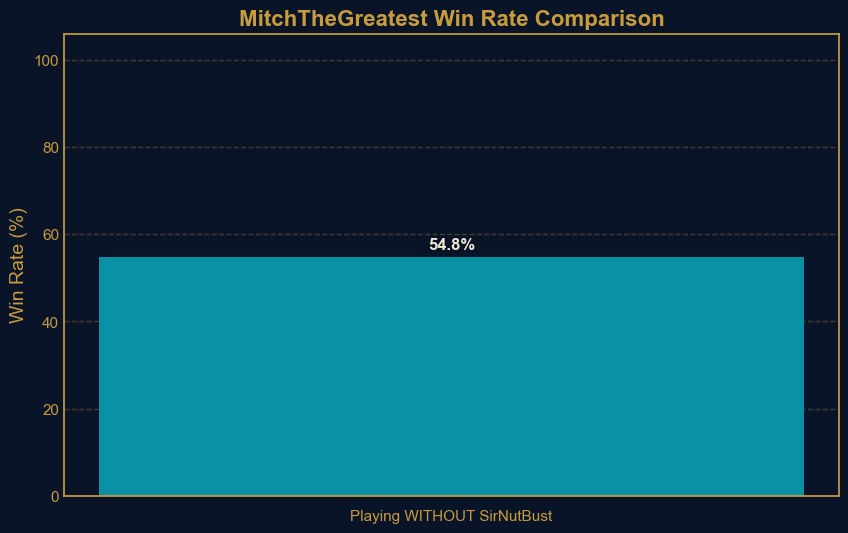

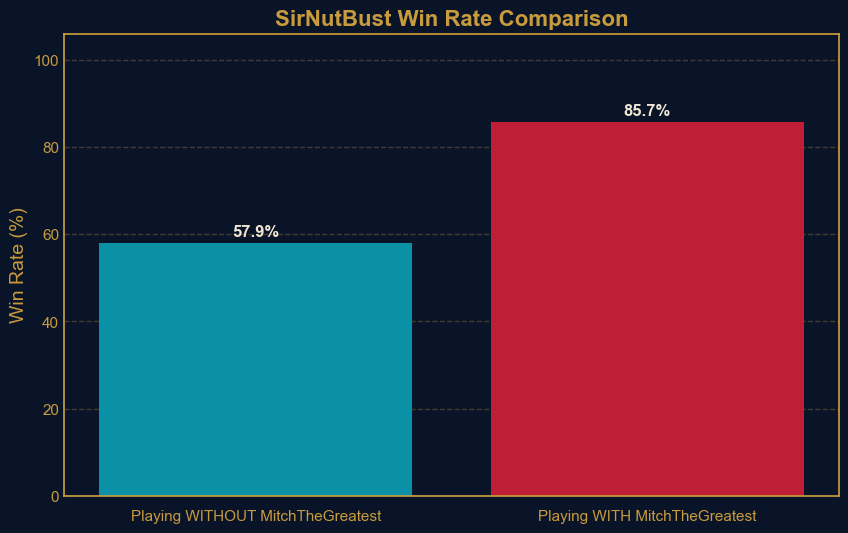

In [409]:


# Set the style of the plots
sns.set(style="whitegrid")

# 1. Win Rate Comparison
def plot_win_rate_comparison(df_solo, df_duo, title, duo_game_name):
    win_rate_solo = df_solo['win'].mean() * 100
    win_rate_duo = df_duo['win'].mean() * 100
    
    # Plot
    fig, ax = plt.subplots(figsize=(10, 6), facecolor='#0A1428')  # Overall figure background color
    bars = ax.bar(
        x=['Playing WITHOUT ' + duo_game_name, 'Playing WITH ' + duo_game_name],  # Dynamic x-axis labels
        height=[win_rate_solo, win_rate_duo],
        color=['#0A91A5', '#BE1E36'],  # Custom bar colors
        linewidth=0  # Remove the white outline on the bars
    )
    
    # Set Y-axis height limit to 100
    ax.set_ylim(0, 106)
    
    # Add value labels to the bars
    for bar in bars:
        yval = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2.0, yval + 1, f'{yval:.1f}%', ha='center', va='bottom', color='#F0E6D2', weight='bold', fontsize=12)
    
    # Apply League of Legends style colors
    ax.set_title(title, fontsize=16, weight='bold', color='#C89B3C')  # Title in gold
    ax.set_ylabel('Win Rate (%)', fontsize=14, color='#C89B3C')  # Y-axis label in gold
    ax.set_xlabel('', fontsize=12, color='#C89B3C')  # Blank X-axis label, styled in gold
    
    # Set axes background color
    ax.set_facecolor('#0A1428')  # Dark navy axes background
    
    # Customize tick colors
    ax.tick_params(axis='x', colors='#C89B3C')  # X ticks in gold
    ax.tick_params(axis='y', colors='#C89B3C', length=0)  # Y ticks in gold, remove tick marks
    
    # Change spine (border) colors
    for spine in ax.spines.values():
        spine.set_edgecolor('#C89B3C')  # Gold spines (borders)
    
    # Gridlines with subtle opacity
    ax.grid(True, axis = 'y', linestyle='--', alpha=0.3, color='#C89B3C')  # Light gold gridlines
    ax.grid(False, axis='x')
    
    plt.show()

# Usage:
plot_win_rate_comparison(filtered_DfOne_solo, filtered_DfOne_duo, gameNameOne + ' Win Rate Comparison', gameNameTwo)
plot_win_rate_comparison(filtered_DfTwo_solo, filtered_DfTwo_duo, gameNameTwo + ' Win Rate Comparison', gameNameOne)


## Kills

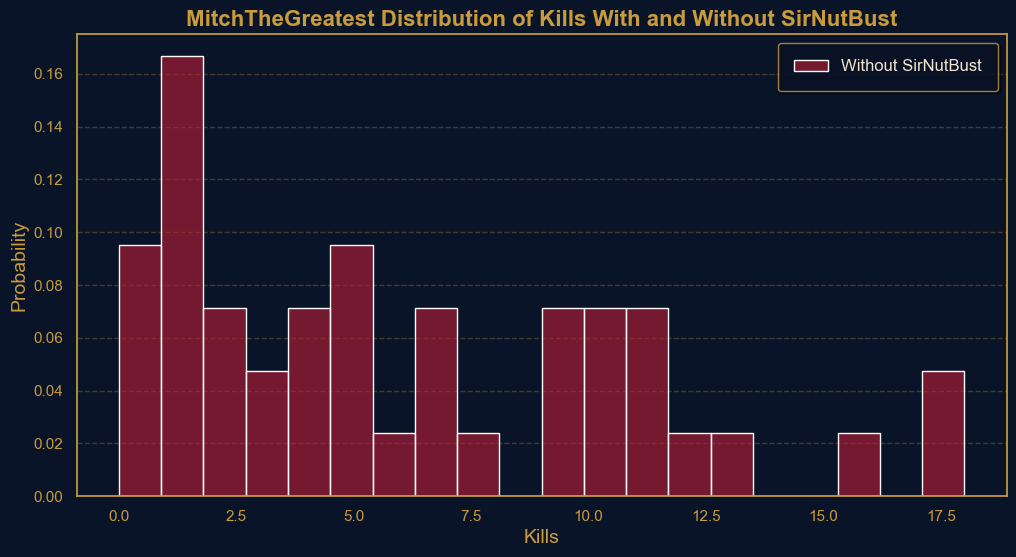

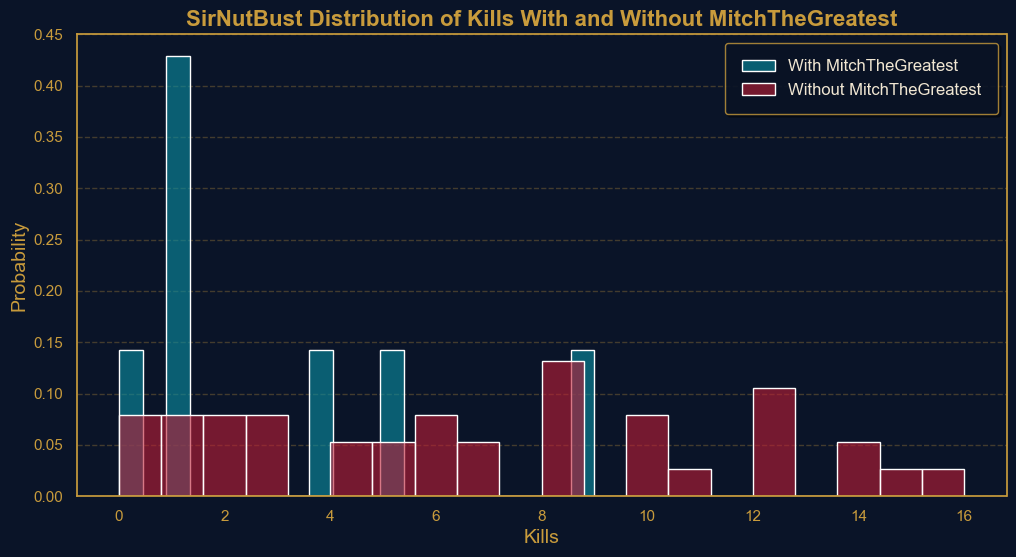

In [410]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Function to plot distribution of kills with and without a player
def plot_kills_distribution(df_solo, df_duo, title, duo_label):
    # Set the style of the plots
    sns.set(style="whitegrid")
    
    # Plotting
    plt.figure(figsize=(12, 6), facecolor='#0A1428')  # Overall figure background color

    # Histograms with custom colors
    sns.histplot(
        df_duo['kills'], 
        color='#0A91A5', label='With ' + duo_label, 
        kde=False, bins=20, stat="probability", alpha=0.6
    )
    sns.histplot(
        df_solo['kills'], 
        color='#BE1E36', label='Without ' + duo_label, 
        kde=False, bins=20, stat="probability", alpha=0.6
    )

    # Title and labels styled in gold
    plt.title(title, fontsize=16, weight='bold', color='#C89B3C')
    plt.xlabel('Kills', fontsize=14, color='#C89B3C')
    plt.ylabel('Probability', fontsize=14, color='#C89B3C')

    # Legend with text color
    plt.legend(facecolor='#0A1428', edgecolor='#C89B3C', fontsize=12, loc='upper right', 
               title='', title_fontsize='13', framealpha=0.8, shadow=True, borderpad=1, 
               labelcolor='#F0E6D2')  # Change text color to F0E6D2

    # Customize tick colors
    plt.xticks(color='#C89B3C')
    plt.yticks(color='#C89B3C')

    # Gridlines with subtle opacity
    plt.grid(axis='y', linestyle='--', alpha=0.3, color='#C89B3C')
    plt.grid(False, axis='x')

    # Customize spines
    ax = plt.gca()  # Get current axes
    ax.set_facecolor('#0A1428')  # Dark navy axes background
    for spine in ax.spines.values():
        spine.set_edgecolor('#C89B3C')  # Gold spines

    plt.show()

# Usage example:
plot_kills_distribution(filtered_DfOne_solo, filtered_DfOne_duo, gameNameOne + ' Distribution of Kills With and Without ' + gameNameTwo, gameNameTwo)
plot_kills_distribution(filtered_DfTwo_solo, filtered_DfTwo_duo, gameNameTwo + ' Distribution of Kills With and Without ' + gameNameOne, gameNameOne)


## Deaths

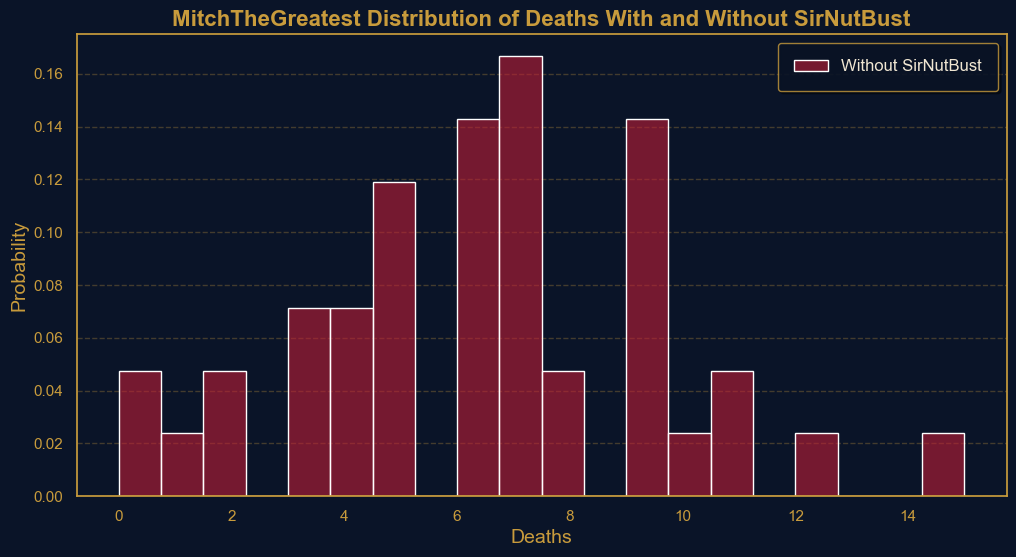

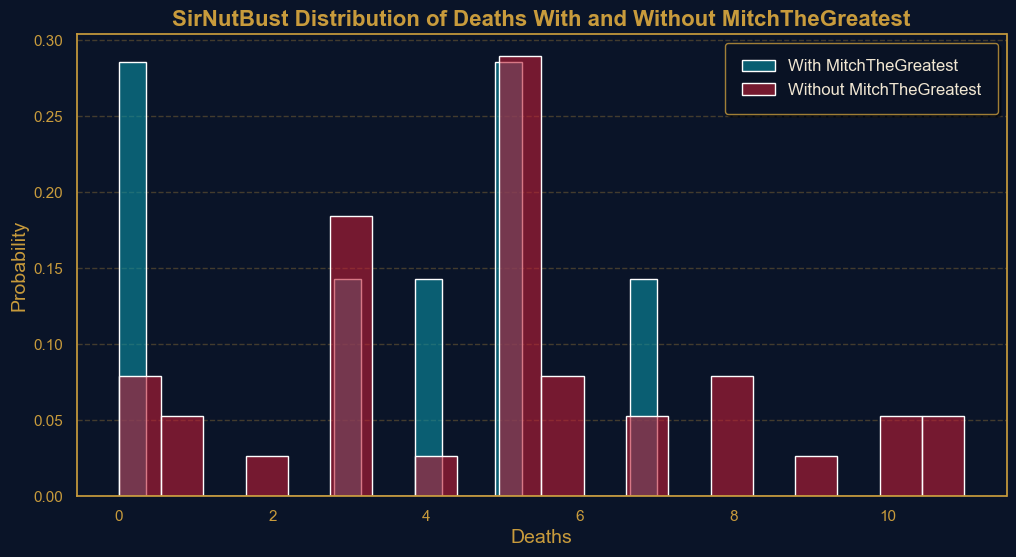

In [411]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Function to plot distribution of deaths with and without a player
def plot_deaths_distribution(df_solo, df_duo, title, duo_label):
    # Set the style of the plots
    sns.set(style="whitegrid")
    
    # Plotting
    plt.figure(figsize=(12, 6), facecolor='#0A1428')  # Overall figure background color

    # Histograms with custom colors
    sns.histplot(
        df_duo['deaths'], 
        color='#0A91A5', label='With ' + duo_label, 
        kde=False, bins=20, stat="probability", alpha=0.6
    )
    sns.histplot(
        df_solo['deaths'], 
        color='#BE1E36', label='Without ' + duo_label, 
        kde=False, bins=20, stat="probability", alpha=0.6
    )

    # Title and labels styled in gold
    plt.title(title, fontsize=16, weight='bold', color='#C89B3C')
    plt.xlabel('Deaths', fontsize=14, color='#C89B3C')
    plt.ylabel('Probability', fontsize=14, color='#C89B3C')

    # Legend with text color
    plt.legend(facecolor='#0A1428', edgecolor='#C89B3C', fontsize=12, loc='upper right', 
               title='', title_fontsize='13', framealpha=0.8, shadow=True, borderpad=1, 
               labelcolor='#F0E6D2')  # Change text color to F0E6D2

    # Customize tick colors
    plt.xticks(color='#C89B3C')
    plt.yticks(color='#C89B3C')

    # Gridlines with subtle opacity
    plt.grid(axis='y', linestyle='--', alpha=0.3, color='#C89B3C')
    plt.grid(False, axis='x')

    # Customize spines
    ax = plt.gca()  # Get current axes
    ax.set_facecolor('#0A1428')  # Dark navy axes background
    for spine in ax.spines.values():
        spine.set_edgecolor('#C89B3C')  # Gold spines

    plt.show()

# Usage example:
plot_deaths_distribution(filtered_DfOne_solo, filtered_DfOne_duo, gameNameOne + ' Distribution of Deaths With and Without ' + gameNameTwo, gameNameTwo)
plot_deaths_distribution(filtered_DfTwo_solo, filtered_DfTwo_duo, gameNameTwo + ' Distribution of Deaths With and Without ' + gameNameOne, gameNameOne)


## KDA

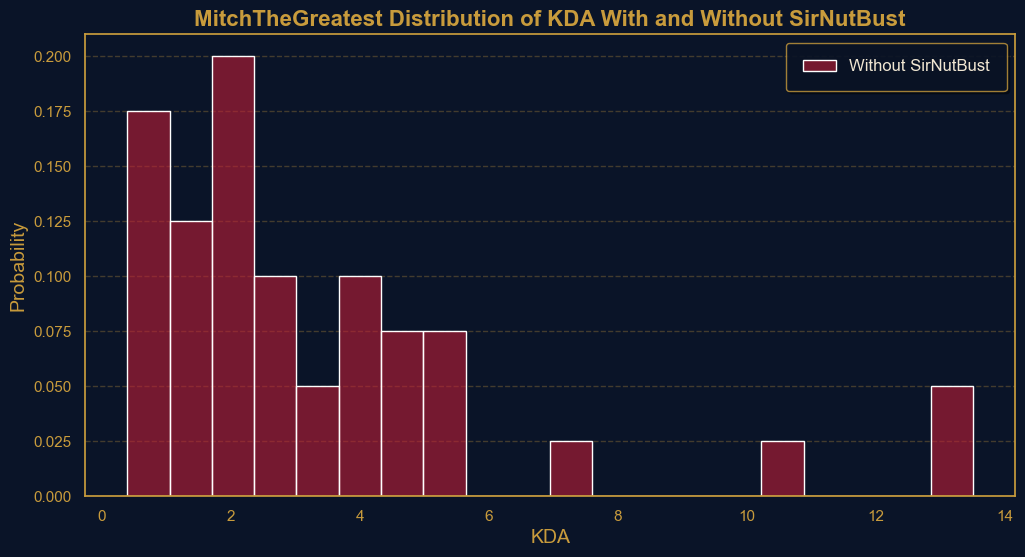

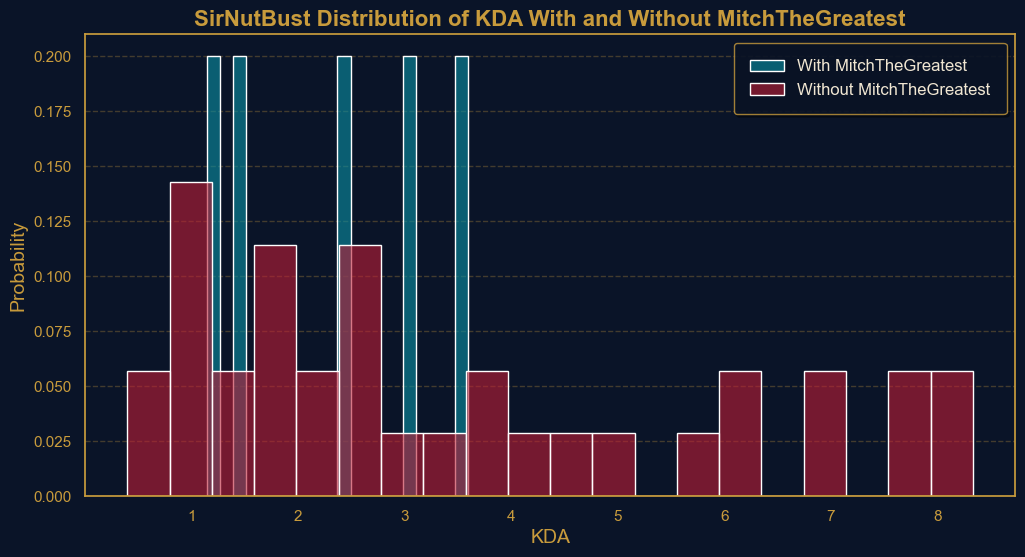

In [412]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Function to plot distribution of KDA with and without a player
def plot_kda_distribution(df_solo, df_duo, title, duo_label):
    # Set the style of the plots
    sns.set(style="whitegrid")
    
    # Plotting
    plt.figure(figsize=(12, 6), facecolor='#0A1428')  # Overall figure background color

    # Histograms with custom colors
    sns.histplot(
        df_duo['kda'], 
        color='#0A91A5', label='With ' + duo_label, 
        kde=False, bins=20, stat="probability", alpha=0.6
    )
    sns.histplot(
        df_solo['kda'], 
        color='#BE1E36', label='Without ' + duo_label, 
        kde=False, bins=20, stat="probability", alpha=0.6
    )

    # Title and labels styled in gold
    plt.title(title, fontsize=16, weight='bold', color='#C89B3C')
    plt.xlabel('KDA', fontsize=14, color='#C89B3C')
    plt.ylabel('Probability', fontsize=14, color='#C89B3C')

    # Legend with text color
    plt.legend(facecolor='#0A1428', edgecolor='#C89B3C', fontsize=12, loc='upper right', 
               title='', title_fontsize='13', framealpha=0.8, shadow=True, borderpad=1, 
               labelcolor='#F0E6D2')  # Change text color to F0E6D2

    # Customize tick colors
    plt.xticks(color='#C89B3C')
    plt.yticks(color='#C89B3C')

    # Gridlines with subtle opacity
    plt.grid(axis='y', linestyle='--', alpha=0.3, color='#C89B3C')
    plt.grid(False, axis='x')

    # Customize spines
    ax = plt.gca()  # Get current axes
    ax.set_facecolor('#0A1428')  # Dark navy axes background
    for spine in ax.spines.values():
        spine.set_edgecolor('#C89B3C')  # Gold spines

    plt.show()

# Usage example:
plot_kda_distribution(filtered_DfOne_solo, filtered_DfOne_duo, gameNameOne + ' Distribution of KDA With and Without ' + gameNameTwo, gameNameTwo)
plot_kda_distribution(filtered_DfTwo_solo, filtered_DfTwo_duo, gameNameTwo + ' Distribution of KDA With and Without ' + gameNameOne, gameNameOne)


## Load Times

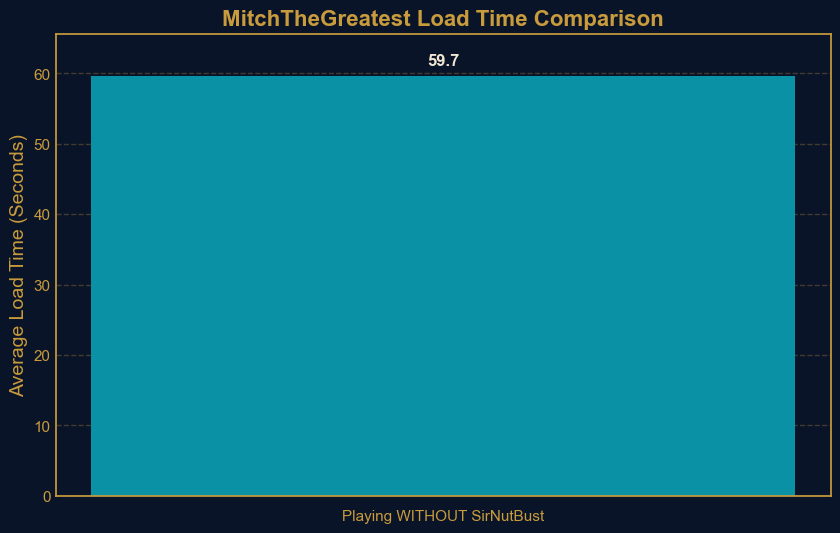

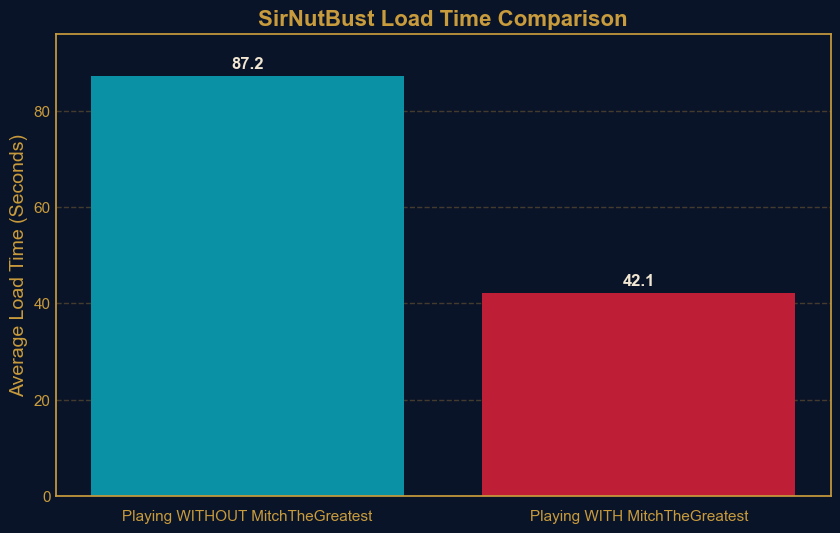

In [413]:
# Modified plot function for 'loadTime'
def plot_load_time_comparison(df_solo, df_duo, title, duo_game_name):
    load_time_solo = df_solo['loadTime'].mean()  # Average loadTime for solo
    load_time_duo = df_duo['loadTime'].mean()  # Average loadTime for duo
    
    # Plot
    fig, ax = plt.subplots(figsize=(10, 6), facecolor='#0A1428')  # Overall figure background color
    bars = ax.bar(
        x=['Playing WITHOUT ' + duo_game_name, 'Playing WITH ' + duo_game_name],  # Dynamic x-axis labels
        height=[load_time_solo, load_time_duo],
        color=['#0A91A5', '#BE1E36'],  # Custom bar colors
        linewidth=0  # Remove the white outline on the bars
    )
    
    # Set Y-axis height limit to a reasonable range
    ax.set_ylim(0, max(load_time_solo, load_time_duo) * 1.1)
    
    # Add value labels to the bars
    for bar in bars:
        yval = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2.0, yval + 1, f'{yval:.1f}', ha='center', va='bottom', color='#F0E6D2', weight='bold', fontsize=12)
    
    # Apply League of Legends style colors
    ax.set_title(title, fontsize=16, weight='bold', color='#C89B3C')  # Title in gold
    ax.set_ylabel('Average Load Time (Seconds)', fontsize=14, color='#C89B3C')  # Y-axis label in gold
    ax.set_xlabel('', fontsize=12, color='#C89B3C')  # Blank X-axis label, styled in gold
    
    # Set axes background color
    ax.set_facecolor('#0A1428')  # Dark navy axes background
    
    # Customize tick colors
    ax.tick_params(axis='x', colors='#C89B3C')  # X ticks in gold
    ax.tick_params(axis='y', colors='#C89B3C', length=0)  # Y ticks in gold, remove tick marks
    
    # Change spine (border) colors
    for spine in ax.spines.values():
        spine.set_edgecolor('#C89B3C')  # Gold spines (borders)
    
    # Gridlines with subtle opacity
    ax.grid(True, axis = 'y', linestyle='--', alpha=0.3, color='#C89B3C')  # Light gold gridlines
    ax.grid(False, axis='x')
    
    plt.show()

# Usage:
plot_load_time_comparison(filtered_DfOne_solo, filtered_DfOne_duo, gameNameOne + ' Load Time Comparison', gameNameTwo)
plot_load_time_comparison(filtered_DfTwo_solo, filtered_DfTwo_duo, gameNameTwo + ' Load Time Comparison', gameNameOne)
